<a href="https://colab.research.google.com/github/rsakml/PCVK_Genap_2022/blob/main/UAS_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### **Importing of Necessary Libraries**

In [3]:
#membuat plot dan visualisasi data menggunakan Matplotlib.
import matplotlib.pyplot as plt

#membuat plot statistik yang lebih menarik dan informatif menggunakan Seaborn.
import seaborn as sns

#penggunaan fungsi-fungsi matematika dan operasi array menggunakan NumPy.
import numpy as np

#penggunaan struktur data dan fungsi analisis data menggunakan Pandas.
import pandas as pd

#penggunaan fungsi-fungsi yang berhubungan dengan angka acak.
import random

#pemrosesan gambar menggunakan OpenCV.
import cv2

#akses dan pengoperasian sistem file
import os

#memanipulasi gambar menggunakan library Python Imaging Library (PIL).
import PIL

#manipulasi dan manajemen jalur file dan direktori
import pathlib

#membagi dataset menjadi subset yang lebih kecil
import splitfolders

#pembuatan dan pelatihan model menggunakan TensorFlow
import tensorflow as tf

#penggunaan API Keras yang terintegrasi dalam TensorFlow.
from tensorflow import keras

#penggunaan berbagai jenis lapisan (layers) yang digunakan dalam model neural network
from tensorflow.keras import layers

#penggunaan model sequential, yang merupakan tipe model neural network yang terdiri dari serangkaian lapisan.
from tensorflow.keras.models import Sequential

#penggunaan berbagai callback yang digunakan saat melatih model, seperti penyimpanan model terbaik, penghentian dini, dan penyesuaian laju pembelajaran.
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#penggunaan alat augmentasi data gambar yang disediakan oleh Keras
from keras.preprocessing.image import ImageDataGenerator

#penggunaan arsitektur model VGG16 yang telah dilatih sebelumnya, yang tersedia dalam Keras.
from keras.applications.vgg16 import VGG16

### **Dataset Loading and Splitting**
Split-folders digunakan untuk membagi dataset menjadi tiga bagian:  Training set(70%), Validation set(15%), and Test set(15%).

In [4]:
base_ds = '/content/drive/MyDrive/UAS_PCVK/Rice_Image'
base_ds = pathlib.Path(base_ds)

In [5]:
#membagi dataset yang terletak di direktori yang ditentukan oleh base_ds menjadi 
#subset pelatihan (70%), subset validasi (15%), dan subset pengujian (15%).

splitfolders.ratio(base_ds, output='imgs', seed=123, ratio=(.7,.15,.15), group_prefix=None)

Copying files: 420 files [00:07, 57.95 files/s]


In [6]:
#daftar nama file gambar dengan ekstensi .jpg
arborio = [fn for fn in os.listdir(f'{base_ds}/Arborio') if fn.endswith('.jpg')]
basmati = [fn for fn in os.listdir(f'{base_ds}/Basmati') if fn.endswith('.jpg')]
ipsala = [fn for fn in os.listdir(f'{base_ds}/Ipsala') if fn.endswith('.jpg')]

#daftar ketiga variabel tersebut sebagai elemen-elemen list
rice = [arborio, basmati, ipsala]

#inisialisasi sebagai list kosong
rice_classes = []

#perulangan melalui daftar direktori dalam direktori 'imgs/train'
#Setiap direktori yang ditemukan ditambahkan ke variabel rice_classes menggunakan operator penambahan +=. 
#Setelah perulangan selesai, list rice_classes diurutkan menggunakan metode .sort() untuk mengurutkan secara alfabetis.
for i in os.listdir('imgs/train'):
    rice_classes+=[i]
rice_classes.sort()

### **Dataset Exploration**
Disini dapat dilihat jumlah total citra dalam dataset, jumlah kelas, dan seberapa baik distribusi citra dari masing-masing varietas.

Total images: 420
Total number of classes: 3
Total Arborio images: 140
Total Basmati images: 140
Total Ipsala images: 140


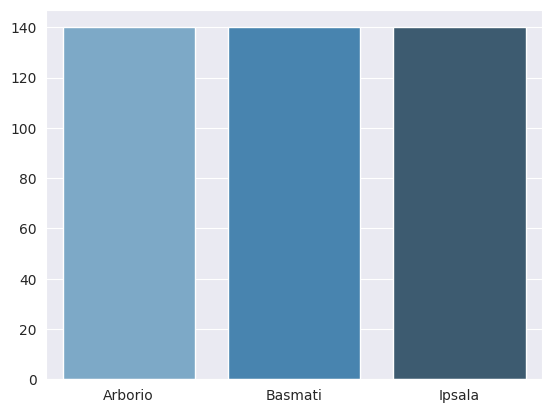

In [7]:
#menghitung jumlah file 
image_count = len(list(base_ds.glob('*/*.jpg')))

#cetak jumlah total gambar dan jumlah kelas yang ada dalam dataset
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(rice_classes)}')

#perulangan untuk setiap kelas dalam rice_classes. 
#mencetak jumlah total gambar untuk setiap kelas menggunakan fungsi print(). 
#jumlah gambar untuk setiap kelas ditambahkan ke list rice_count dan variabel count ditingkatkan seiring dengan perulangan.
count = 0
rice_count = []
for x in rice_classes:
  print(f'Total {x} images: {len(rice[count])}')
  rice_count.append(len(rice[count]))
  count += 1

#menampilkan informasi tersebut dalam bentuk diagram batang menggunakan library Seaborn dan Matplotlib
sns.set_style('darkgrid')
sns.barplot(x=rice_classes, y=rice_count, palette="Blues_d")
plt.show()

### Sample Images
Setiap gambar dari dataset memiliki dimensi 250 x 250 dan tipe warna RGB

Image dimensions: (250, 250, 3)


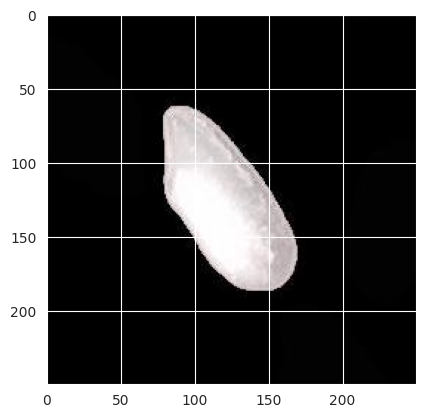

In [8]:
sample_img = cv2.imread('/content/drive/MyDrive/UAS_PCVK/Rice_Image/Arborio/Arborio (10).jpg')
plt.imshow(sample_img)
print(f'Image dimensions: {sample_img.shape}')

In [9]:
#memuat dan menampilkan secara acak gambar dari setiap kelas dalam dataset
def load_random_img(dir, label):
  #ntuk membuat sebuah objek figure dengan ukuran 10x10 inci.
  plt.figure(figsize=(10,10))
  i=0

  #Perulangan dilakukan untuk setiap kelas dalam rice_classes. 
  #Variabel label akan berisi nama kelas saat ini.
  for label in rice_classes:
    #Variabel i ditingkatkan sebesar 1 setiap kali melalui iterasi dalam perulangan,untuk menentukan posisi subplot gambar
    i+=1
    #membuat subplot gambar dalam objek figure. 5 subplot dengan susunan 1 baris dan 5 kolom.
    plt.subplot(1, 5, i)
    #memilih secara acak satu file gambar dari direktori yang sesuai dengan kelas saat ini
    file = random.choice(os.listdir(f'{dir}/{label}'))
    #menggabungkan jalur direktori dengan nama file untuk membentuk jalur lengkap ke gambar yang dipilih
    image_path = os.path.join(f'{dir}/{label}', file)
    #membaca gambar dengan menggunakan fungsi cv2.imread()
    img=cv2.imread(image_path)
    #menentukan judul subplot gambar
    plt.title(label)
    #menampilkan gambar yang telah dibaca sebelumnya.
    plt.imshow(img)
    #menghilangkan garis-garis grid pada subplot gambar.
    plt.grid(None)
    #menghilangkan sumbu pada subplot gambar.
    plt.axis('off')

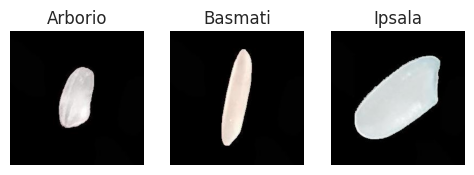

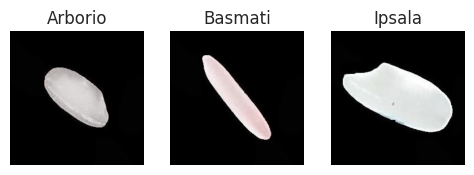

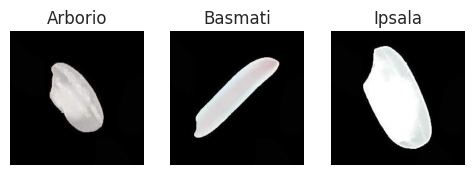

In [10]:
#Perulangan ini akan dieksekusi sebanyak 3 kali.
for i in range(3):
  #menampilkan gambar acak dari setiap kelas dalam dataset
  load_random_img(base_ds, rice_classes)

In [11]:
#128 gambar akan diproses dalam setiap iterasi.
batch_size = 128
#menentukan ukuran tinggi dan lebar gambar yang akan digunakan dalam proses pelatihan
img_height, img_width = 175, 175
#untuk menentukan dimensi input model berisi tinggi, lebar, dan jumlah saluran warna (RGB) dari gambar.
input_shape = (img_height, img_width, 3)

### **Data Pre-processing**

In [12]:
#ImageDataGenerator digunakan untuk mengkonfigurasi dan menerapkan augmentasi data pada gambar.
#rescale digunakan untuk melakukan normalisasi pada nilai piksel gambar untuk mempercepat konvergensi dan stabilisasi pelatihan model.
#ilai 1./255 digunakan untuk membagi setiap nilai piksel dengan 255, sehingga setiap nilai piksel akan berada dalam rentang antara 0 dan 1. 

datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# flow_from_directory : memuat data gambar dari direktori dan menghasilkan generator data.

train_ds = datagen.flow_from_directory(
    #Direktori yang berisi data gambar untuk pelatihan model.
    'imgs/train',
    #ukuran target gambar yang akan dihasilkan oleh generator,
    target_size = (img_height, img_width),
    #Ukuran batch yang digunakan dalam pelatihan.
    batch_size = batch_size,
    #Subset yang akan digunakan dari dataset, dalam hal ini adalah subset pelatihan.
    subset = "training",
    # Mode kelas yang digunakan adalah kelas-kelas yang direpresentasikan dalam format one-hot encoding.
    class_mode='categorical')

val_ds = datagen.flow_from_directory(
    #Direktori yang berisi data gambar untuk validasi model
    'imgs/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    #menentukan apakah data akan diacak sebelum setiap epoch. Dalam hal ini, data validasi tidak diacak.
    shuffle=False)

test_ds = datagen.flow_from_directory(
    'imgs/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 294 images belonging to 3 classes.
Found 63 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


In [14]:
#memvisualisasikan sejarah pelatihan model, 
#melihat tren akurasi dan kerugian selama pelatihan, serta membandingkan performa antara data pelatihan dan data validasi.
def plot_train_history(history):
  #Mengatur ukuran gambar plot
    plt.figure(figsize=(15,5))
    #Membuat subplot pertama untuk plot akurasi.
    plt.subplot(1,2,1)
    #Menggambar garis plot untuk akurasi pada setiap epoch dari data pelatihan.
    plt.plot(history.history['accuracy'])
    #Menggambar garis plot untuk akurasi pada setiap epoch dari data validasi.
    plt.plot(history.history['val_accuracy'])
    #Memberikan judul plot untuk akurasi
    plt.title('Model accuracy')
    #Memberikan label sumbu y untuk akurasi
    plt.ylabel('accuracy')
    #Memberikan label sumbu x untuk epoch.
    plt.xlabel('epoch')
    #Menampilkan legenda yang menunjukkan plot dari data pelatihan dan data validasi.
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.subplot(1,2,2)
    #Membuat subplot kedua untuk plot kerugian (loss)
    plt.plot(history.history['loss'])
    #Menggambar garis plot untuk kerugian pada setiap epoch dari data validasi.
    plt.plot(history.history['val_loss'])
    #Memberikan judul plot untuk kerugian.
    plt.title('Model loss')
    #Memberikan label sumbu y untuk kerugian.
    plt.ylabel('loss')
    #Memberikan label sumbu x untuk epoch.
    plt.xlabel('epoch')
    #Menampilkan legenda yang menunjukkan plot dari data pelatihan dan data validasi.
    plt.legend(['train', 'validation'], loc='upper left')
    #Menampilkan plot secara keseluruhan.
    plt.show()

###**Vanilla CNN Model**

model_vanilla adalah sebuah model jaringan saraf konvolusi (Convolutional Neural Network/CNN) yang digunakan untuk klasifikasi gambar

In [15]:
#membentuk blok konvolusi yang berulang untuk mengekstraksi fitur dari gambar.
model_vanilla = tf.keras.Sequential([
    #Lapisan konvolusi dengan 32 filter, masing-masing berukuran 3x3. 
    #Menggunakan fungsi aktivasi ReLU dan menerima input dengan ukuran input_shape.
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    #Lapisan normalisasi batch untuk mengnormalisasi nilai output dari lapisan sebelumnya.
    tf.keras.layers.BatchNormalization(),
    #Lapisan konvolusi dengan 32 filter, masing-masing berukuran 3x3. 
    #Menggunakan fungsi aktivasi ReLU dan padding 'same' untuk menjaga dimensi output yang sama.
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    #Lapisan normalisasi batch untuk mengnormalisasi nilai output dari lapisan sebelumnya pada sumbu ketiga (sudut pandang channel).
    tf.keras.layers.BatchNormalization(axis = 3),
    #Lapisan pooling maksimum dengan ukuran filter 2x2 dan padding 'same' untuk mempertahankan dimensi output yang sama.
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    #Lapisan dropout yang secara acak mengatur sebagian unit menjadi 0 pada saat pelatihan dengan tingkat dropout 0.3.
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.5),
    
    #Lapisan yang mengubah output dari lapisan sebelumnya menjadi vektor satu dimensi.
    tf.keras.layers.Flatten(),
    #Lapisan fully connected dengan 512 unit dan menggunakan fungsi aktivasi ReLU.
    tf.keras.layers.Dense(512, activation='relu'),
    #apisan normalisasi batch untuk mengnormalisasi nilai output dari lapisan sebelumnya.
    tf.keras.layers.BatchNormalization(),
    #Lapisan dropout dengan tingkat dropout 0.5.
    tf.keras.layers.Dropout(0.5),
    #Lapisan fully connected dengan 128 unit dan menggunakan fungsi aktivasi ReLU.
    tf.keras.layers.Dense(128, activation='relu'),
    #Lapisan dropout dengan tingkat dropout 0.25.
    tf.keras.layers.Dropout(0.25),
    #Lapisan fully connected dengan 3 unit, yang sesuai dengan jumlah kelas yang mungkin. 
    #Menggunakan fungsi aktivasi softmax untuk menghasilkan probabilitas untuk setiap kelas.
    tf.keras.layers.Dense(3, activation='softmax')
])

In [16]:
#mengompilasi model
#digunakan optimisasi Adam yang merupakan algoritma populer untuk melatih jaringan saraf.
#digunakan categorical cross-entropy yang cocok untuk masalah klasifikasi multikelas.
#metrik akurasi yang mengukur persentase klasifikasi yang benar.
model_vanilla.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#Menampilkan jumlah parameter yang dapat dipelajari dan dimensi output dari setiap lapisan dalam model
model_vanilla.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 173, 173, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 173, 173, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 173, 173, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 173, 173, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 87, 87, 32)       0         
 )                                                               
                                                        

###**Callbacks**
callbacks adalah objek yang dapat melakukan tindakan pada titik tertentu selama pelatihan model, seperti menyimpan model terbaik, menghentikan pelatihan jika terjadi overfitting, atau mengurangi laju pembelajaran jika kemajuan pelatihan melambat. 

In [17]:
#untuk memastikan bahwa direktori saved_models ada, dan jika tidak, maka akan membuat direktori tersebut menggunakan os.makedirs(). 
#Direktori ini akan digunakan untuk menyimpan model terbaik yang ditemukan selama pelatihan.

models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

#menyimpan model terbaik selama pelatihan berdasarkan performa pada data validasi. 
#filepath menentukan lokasi dan nama file untuk menyimpan model terbaik. 
#monitor menentukan metrik yang akan digunakan untuk memantau performa model (dalam kasus ini, menggunakan metrik akurasi pada data validasi). 
#mode menentukan apakah nilai yang lebih tinggi dari metrik yang dipantau adalah lebih baik (dalam kasus ini, menggunakan mode 'max'). 
#verbose menentukan tingkat kejelasan informasi yang ditampilkan saat menyimpan model. 
#save_best_only=True mengatur agar hanya model terbaik yang akan disimpan.

checkpointer = ModelCheckpoint(filepath='saved_models/model_vanilla.hdf5', 
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)

#menghentikan pelatihan jika tidak ada peningkatan yang signifikan dalam fungsi kerugian pada data validasi dalam beberapa epoch berturut-turut (overfitting). 
#factor menentukan faktor pengurangan laju pembelajaran (dalam kasus ini, menggunakan faktor 0.2). 
#patience menentukan berapa banyak epoch yang akan dijalankan tanpa adanya peningkatan sebelum laju pembelajaran dikurangi. 
#min_lr menentukan batas bawah untuk laju pembelajaran.

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)

#Menggabungkan semua callback yang telah disiapkan ke dalam sebuah list.
callbacks=[early_stopping, reduce_lr, checkpointer]

In [18]:
#melatih model model_vanilla menggunakan data pelatihan train_ds dan data validasi val_ds selama 40 epoch. 
#Callbacks yang telah didefinisikan sebelumnya juga digunakan selama proses pelatihan.

history1 = model_vanilla.fit(train_ds, epochs = 10, validation_data = val_ds, callbacks=callbacks)

Epoch 1/10
3/3 [==============================] - ETA: 0s - loss: 1.2728 - accuracy: 0.6020 
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to saved_models/model_vanilla.hdf5
3/3 [==============================] - 116s 30s/step - loss: 1.2728 - accuracy: 0.6020 - val_loss: 1.0994 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: 0.0935 - accuracy: 0.9558 
Epoch 2: val_accuracy did not improve from 0.33333
3/3 [==============================] - 111s 34s/step - loss: 0.0935 - accuracy: 0.9558 - val_loss: 1.4171 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/10
3/3 [==============================] - ETA: 0s - loss: 0.0382 - accuracy: 0.9864 
Epoch 3: val_accuracy did not improve from 0.33333
3/3 [==============================] - 93s 27s/step - loss: 0.0382 - accuracy: 0.9864 - val_loss: 1.9756 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/10
3/3 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9966 


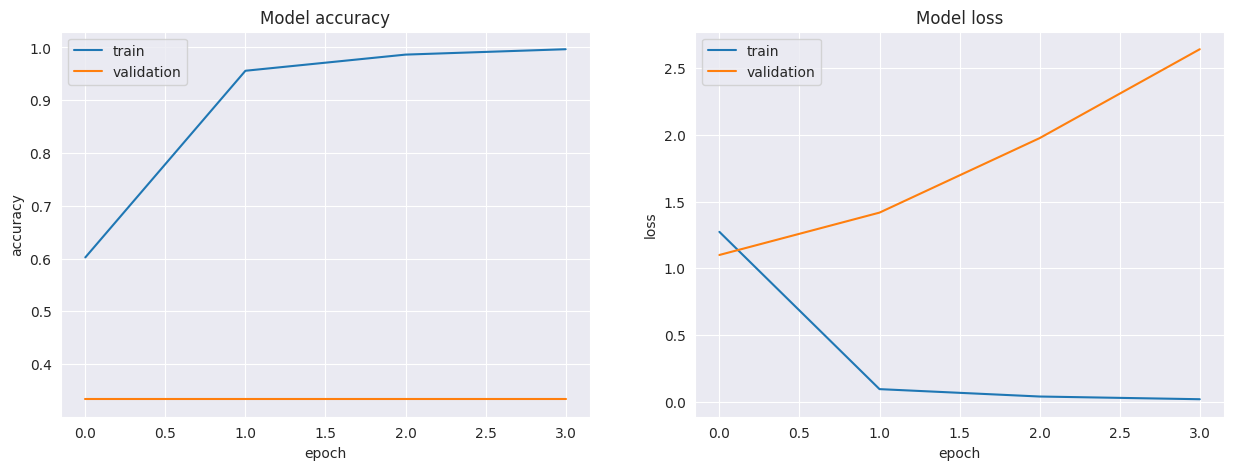

In [19]:
# model_vanilla.load_weights() memuat bobot (weights) dari model terbaik yang telah disimpan sebelumnya
# Bobot digunakan untuk menginisialisasi model model_vanilla sehingga model akan memiliki parameter yang telah dilatih sebelumnya.
model_vanilla.load_weights('saved_models/model_vanilla.hdf5')

#memvisualisasikan histori pelatihan yang telah disimpan dalam objek history1. 
#Fungsi ini akan menampilkan grafik untuk akurasi dan loss pada data pelatihan dan data validasi selama setiap epoch.
plot_train_history(history1)

###**Model Evaluation of Vanilla CNN**

In [20]:
#mengevaluasi performa model model_vanilla menggunakan data pengujian test_ds.
#Evaluasi ini dilakukan dengan memanggil metode evaluate() pada model, dengan argumen test_ds sebagai data pengujian.
#ika verbose=1, maka informasi evaluasi akan ditampilkan secara detail.
score1 = model_vanilla.evaluate(test_ds, verbose=1)

1/1 [==============================] - 5s 5s/step - loss: 1.0989 - accuracy: 0.3333


In [21]:
#elakukan analisis lebih lanjut terhadap hasil prediksi model.\
from sklearn.metrics import classification_report, confusion_matrix

#menggunakan model model_vanilla untuk melakukan prediksi pada data pengujian test_ds dengan memanggil metode predict(). 
#Hasil prediksi akan disimpan dalam variabel Y_pred.
Y_pred = model_vanilla.predict(test_ds)

1/1 [==============================] - 5s 5s/step


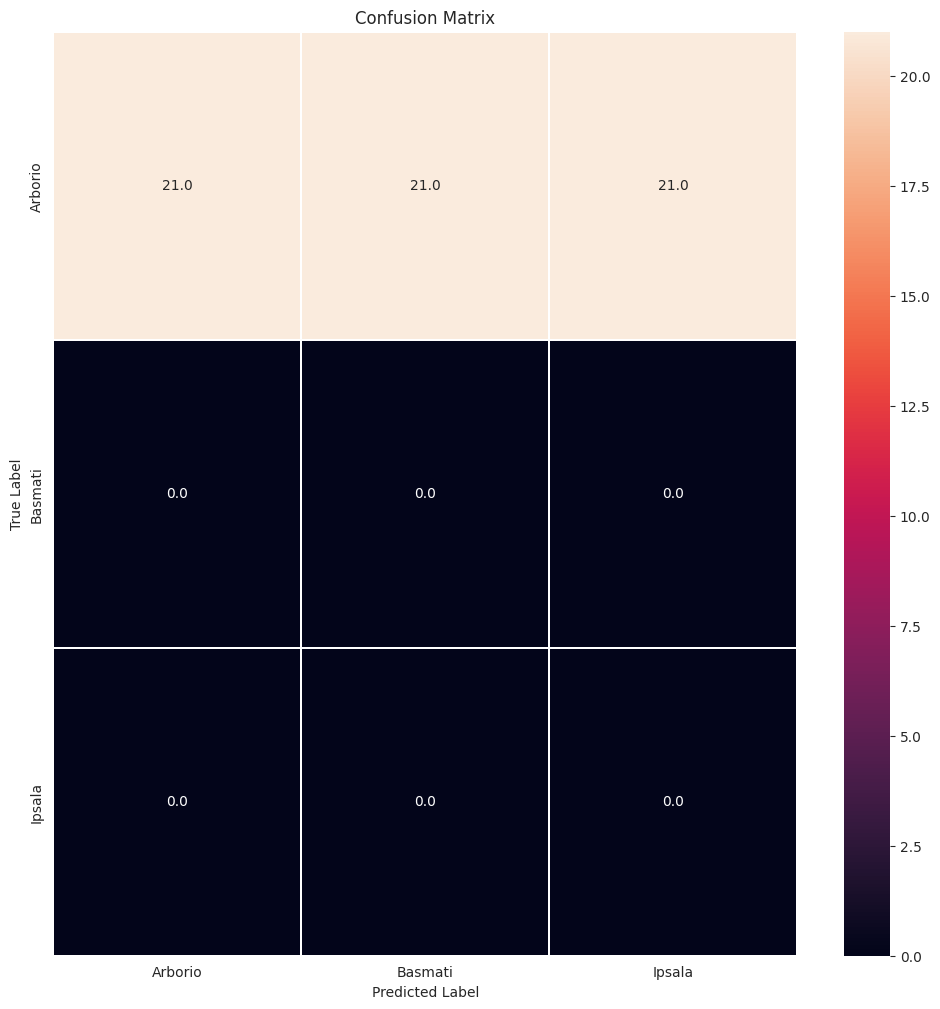

In [22]:
#np.argmax() untuk mengambil indeks kelas dengan probabilitas prediksi tertinggi dari setiap prediksi dalam Y_pred. 
#Ini dilakukan dengan mengatur argumen axis=1 untuk melakukan pemilihan dalam arah horizontal.

y_pred = np.argmax(Y_pred, axis=1)

#menghitung matriks kebingungan berdasarkan y_pred dan test_ds.classes.
#Matriks kebingungan ini berisi jumlah prediksi yang benar dan salah untuk setiap pasangan kelas yang mungkin.

confusion_mtx = confusion_matrix(y_pred, test_ds.classes)

#plt.subplots() untuk membuat objek gambar dan sumbu. 
#sns.heatmap() digunakan untuk membuat peta panas (heatmap) dari matriks kebingungan dengan penandaan dan anotasi yang sesuai. 
#Fungsi sns.color_palette() digunakan untuk mengatur palet warna yang digunakan dalam peta panas.

f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Label-label ini akan ditampilkan dengan menggunakan indeks kelas yang terkait dengan test_ds.class_indices dan rice_classes.
ax.xaxis.set_ticklabels(test_ds.class_indices)
ax.yaxis.set_ticklabels(rice_classes)
plt.title("Confusion Matrix")
plt.show()

In [23]:
#classification_report dari sklearn.metrics untuk menghasilkan laporan klasifikasi yang mendetail berdasarkan label sebenarnya (test_ds.classes) dan hasil prediksi (y_pred). 
#Argumen target_names digunakan untuk memberikan nama kelas yang sesuai.
report1 = classification_report(test_ds.classes, y_pred, target_names=rice_classes, output_dict=True)

#hasil laporan klasifikasi disimpan dalam variabel report1 dengan menggunakan argumen output_dict=True. 
#Kemudian, laporan klasifikasi tersebut diubah menjadi DataFrame menggunakan pd.DataFrame(report1).transpose().
df1 = pd.DataFrame(report1).transpose()
df1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
Arborio,0.333333,1.000000,0.500000,21.000000
Basmati,0.000000,0.000000,0.000000,21.000000
Ipsala,0.000000,0.000000,0.000000,21.000000
accuracy,0.333333,0.333333,0.333333,0.333333
macro avg,0.111111,0.333333,0.166667,63.000000
weighted avg,0.111111,0.333333,0.166667,63.000000


###**Transfer Learning**

In [24]:
#weights="imagenet" menunjukkan bahwa kita menggunakan bobot yang telah dilatih pada dataset ImageNet. 
#include_top=False menunjukkan bahwa lapisan fully connected teratas (top layer) tidak akan disertakan dalam model.
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)

#memastikan bahwa bobot dalam lapisan VGG16 tidak akan diperbarui selama pelatihan.
vgg16.trainable = False

#mendefinisikan input layer 
#Input layer inputs akan dihubungkan ke lapisan VGG16 dengan x = vgg16(inputs, training=False).
#training=False mengindikasikan bahwa kita tidak ingin melatih lapisan VGG16 saat melatih model.
#tf.keras.layers.GlobalAveragePooling2D() untuk mengubah keluaran dari VGG16 menjadi representasi fitur global yang lebih ringkas.

inputs = tf.keras.Input(input_shape)
x = vgg16(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

#menambahkan lapisan Dense dengan 1024 unit dan fungsi aktivasi ReLU 
x = tf.keras.layers.Dense(1024, activation='relu')(x)

#menambahkan lapisan Dense terakhir dengan 5 unit dan fungsi aktivasi softmax untuk menghasilkan probabilitas kelas 
x = tf.keras.layers.Dense(3, activation='softmax')(x)

#embuat model model_vgg16 dengan menggunakan tf.keras.Model(inputs, x), di mana inputs adalah input layer dan x adalah output layer terakhir.
model_vgg16 = tf.keras.Model(inputs, x)

58889256/58889256 [==============================] - 0s 0us/step


In [25]:
#melakukan kompilasi 
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#mencetak ringkasan (summary) dari model akan menampilkan informasi tentang struktur model, jumlah parameter yang dapat dipelajari, dan ukuran keluaran dari setiap lapisan.
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 175, 175, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 1024)              525312    
                                                                 
 dense_4 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 15,243,075
Trainable params: 528,387
Non-trainable params: 14,714,688
___________________________________________

In [26]:
#ModelCheckpoint digunakan untuk menyimpan model dengan performa terbaik berdasarkan metrik yang dipantau.
#filepath menentukan tempat penyimpanan model yang terbaik.
#monitor menentukan metrik yang akan dipantau, yaitu 'val_accuracy' (akurasi validasi).
#mode menentukan mode pemantauan, yaitu 'max' yang berarti kita ingin memaksimalkan nilai metrik.
#verbose mengontrol pesan yang ditampilkan selama pelatihan
#save_best_only=True menandakan bahwa hanya model terbaik yang akan disimpan.

checkpointer = ModelCheckpoint(filepath='saved_models/model_vgg16.hdf5', 
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)

#EarlyStopping digunakan untuk menghentikan pelatihan jika tidak ada peningkatan dalam metrik yang dipantau dalam beberapa epoch.
#monitor menentukan metrik yang akan dipantau, yaitu 'val_loss' (loss validasi).
#mode menentukan mode pemantauan, yaitu 'min' yang berarti kita ingin meminimalkan nilai metrik.
#verbose mengontrol pesan yang ditampilkan selama pelatihan
#patience menentukan jumlah epoch yang harus melewati tanpa peningkatan sebelum pelatihan dihentikan.

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

#ReduceLROnPlateau digunakan untuk mengurangi laju pembelajaran jika tidak ada peningkatan dalam metrik yang dipantau dalam beberapa epoch.
#factor menentukan faktor pengurangan laju pembelajaran. 
#min_lr menentukan batas bawah untuk laju pembelajaran.

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [27]:
#melakukan pelatihan model model_vgg16 menggunakan data pelatihan (train_ds) selama 40 epoch. 
#Selama pelatihan, data validasi (val_ds) digunakan untuk mengevaluasi performa model.

history2 = model_vgg16.fit(train_ds, epochs = 10, validation_data = val_ds, callbacks=callbacks)

Epoch 1/10
3/3 [==============================] - ETA: 0s - loss: 1.0657 - accuracy: 0.4626 
Epoch 1: val_accuracy improved from -inf to 0.52381, saving model to saved_models/model_vgg16.hdf5
3/3 [==============================] - 146s 51s/step - loss: 1.0657 - accuracy: 0.4626 - val_loss: 0.8923 - val_accuracy: 0.5238 - lr: 0.0010
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: 0.8381 - accuracy: 0.5918 
Epoch 2: val_accuracy improved from 0.52381 to 0.92063, saving model to saved_models/model_vgg16.hdf5
3/3 [==============================] - 141s 64s/step - loss: 0.8381 - accuracy: 0.5918 - val_loss: 0.7124 - val_accuracy: 0.9206 - lr: 0.0010
Epoch 3/10
3/3 [==============================] - ETA: 0s - loss: 0.6261 - accuracy: 0.9422 
Epoch 3: val_accuracy did not improve from 0.92063
3/3 [==============================] - 118s 38s/step - loss: 0.6261 - accuracy: 0.9422 - val_loss: 0.5788 - val_accuracy: 0.9206 - lr: 0.0010
Epoch 4/10
3/3 [===========================

In [28]:
#untuk memuat bobot model dari file yang ditentukan.
model_vgg16.load_weights('saved_models/model_vgg16.hdf5')

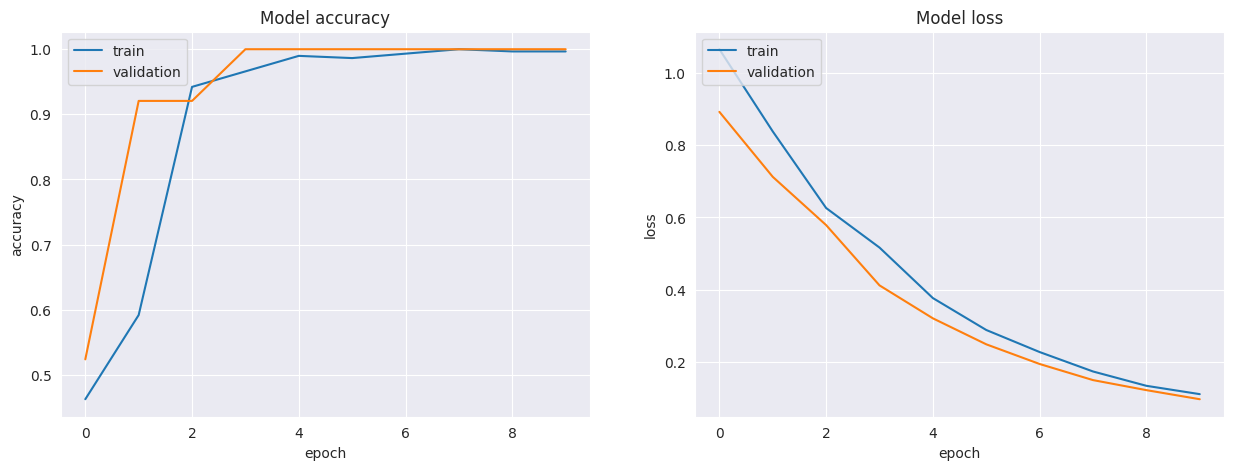

In [29]:
#memvisualisasikan riwayat pelatihan dari model.

plot_train_history(history2)

In [30]:
#mengevaluasi performa model model_vgg16 dengan menggunakan data uji (test_ds)
#evaluate() digunakan untuk menghitung loss (kerugian) dan akurasi model pada data uji.

score2 = model_vgg16.evaluate(test_ds, verbose=1)

#ilai loss dan akurasi model model_vanilla akan dicetak menggunakan score1[0] dan score1[1], 
#sedangkan nilai loss dan akurasi model model_vgg16 akan dicetak menggunakan score2[0] dan score2[1].
print(f'Model 1 Vanilla Loss: {score1[0]}, Accuracy: {score1[1]*100}')
print(f'Model 2 VGG16 Loss: {score2[0]}, Accuracy: {score2[1]*100}')

1/1 [==============================] - 23s 23s/step - loss: 0.4018 - accuracy: 1.0000
Model 1 Vanilla Loss: 1.098882794380188, Accuracy: 33.33333432674408
Model 2 VGG16 Loss: 0.4018213152885437, Accuracy: 100.0


###**Fine Tuning**

In [1]:
#mengatur kembali layer-layer pada model VGG16 (vgg16) agar dapat dilatih dengan mengeset atribut trainable menjadi True. 
#Dengan ini, bobot pada layer-layer VGG16 juga akan diperbarui selama proses pelatihan.
vgg16.trainable = True

#model model_vgg16 dikompilasi kembali dengan pengaturan optimizer baru (optimizer=keras.optimizers.Adam(1e-5)) dan 
#fungsi loss yang sama yaitu categorical crossentropy. 
#Selain itu, metrik yang akan dihitung adalah akurasi.
model_vgg16.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy', metrics=['accuracy'])

NameError: ignored

In [2]:
#melatih ulang model model_vgg16 dengan dataset pelatihan (train_ds) selama 40 epoch. 
#Proses pelatihan juga akan menggunakan dataset validasi (val_ds) untuk memonitor performa model selama pelatihan.
#Callback checkpointer akan menyimpan model dengan akurasi validasi terbaik
#Callback early_stopping akan menghentikan pelatihan jika terjadi penurunan yang signifikan pada loss validasi untuk mencegah overfitting. 
#Callback reduce_lr akan mengurangi learning rate jika terjadi stagnasi pada loss validasi.

history3 = model_vgg16.fit(train_ds, epochs = 10, validation_data = val_ds, callbacks=callbacks)

NameError: ignored

In [3]:
#Dengan menggunakan fungsi load_weights() pada objek model, bobot yang telah disimpan dalam file 'saved_models/model_vgg16.hdf5' akan dimuat ke dalam model model_vgg16. 
#Dengan ini, model akan memiliki bobot yang sama dengan bobot terbaik yang telah disimpan sebelumnya setelah proses pelatihan dilakukan

model_vgg16.load_weights('saved_models/model_vgg16.hdf5')

NameError: ignored